#                   Simulación de Monte Carlo: decaimiento de $K^0$ y $\Lambda^0$


Las técnicas de *Monte Carlo* son empleadas para hacer realizar cálculos computacionales empleando números pseudo aleatorios, de esta manera se simula procesos aleatorios que ocurren en la naturaleza, como en este caso los decaimientos de partículas elementales, este método ha permitido a los científicos realizar cálculos que serían imposibles de no tener un computador


Para este trabajo, se usó el método de Monte Carlo para realizar una simulación del decaimiento del mesón $K$ y del barión $\lambda^{0}$ junto su antipartícula. La simulación consistió de estudiar dos partículas producto del decaimiento de una partícula madre ($K^{0}$, $\Lambda^{0}$ o $\bar{\Lambda}^{0}$). Se simularon cantidades como los momentos, masa y energías en el régimen relativista de los productos de decaimiento. A partir de estas cantidades se determinó la masa de la partícula madre, debido a la conservación del momento y la energía, que resulta ser una invariante relativista. En la relación con los datos del gráfico de Armenteros, de los momentos de los productos de decaimiento se obtuvieron las componentes que son  paralelas (longitudinal) y perpendiculares (transversales) al marco de referencia. En este caso, los momentos longitudinales son las componentes en el eje $x$, y las componentes transversales son la magnitud de las componentes $y$ y $z$. Se gráfico uno de los momentos transversales, de una de las dos partículas producto del decaimiento, en función de una cantidad que reúne los momentos longitudinales conocida como asimetría:


\begin{equation*}
    \alpha = \frac{p_{L}^{+} - p_{L}^{-}}{p_{L}^{+} - p_{L}^{-}},
  \end{equation*}
donde los superíndices hacen referencia si van en la dirección positiva o negativa del eje $x$.

En la simulación del proceso de decaimiento se obtuvo un gráfica conocido como gráfica de Armenteros. Esta gráfica es de bastante importancia pues reconstruye el proceso de decaimiento, además, si no se reconocieran las partículas con esta gráfica se puede reconstruir la masa madre de la partícula desde la cinemática de los productos de decaimiento

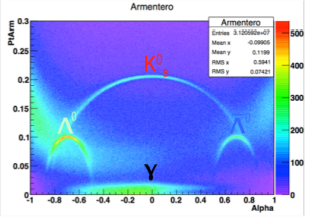

La diferencia de color en el gráfico y la especificación de las dos asimetrías, es debido a que al momento de gráfica una asimetría, se obtenía solo media parte del gráfico. La gráfica de Armenteros aparecía si considerábamos dos asimetrías. Una donde tomábamos los momentos longitudinales de la primera partícula del decaimiento y le restábamos los momentos longitudinales de la segunda, y la otra simetría invertía el orden, es decir, a los momento longitudinales de la segunda partícula se le restan la de la primera.

A continuación, el código de python:

C:\Users\USA\anaconda3\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in sqrt


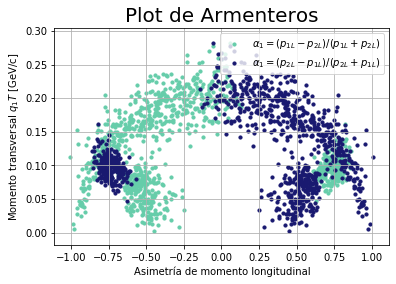

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
def metodos_armenteros():
    #PASO 1: MASAS DE LAS PARTICULAS 
    masa_kaon = 497.671/10.0**3 #GeV
    masa_lambda = 1115.63/10.0**3 #GeV
    masa_proton = 938.27231/10.0**3 #GeV
    masa_pion = 139.56755/10.0**3 #GeV
    #PASO 2: SELECCION DEL PROCESO
    #Generador de numeros aleatorios
    Na = random.random()
    # Kaon ---> proton + pion
    if Na <= 0.5:
        masa_madre = masa_kaon
        tipo_particula = "kaon"
        m1 = masa_pion
        m2 = masa_pion
    if Na > 0.5 and Na <= 0.75:
        masa_madre = masa_lambda
        tipo_particula = "Particula"
        
        m1 = masa_proton
        m2 = masa_pion
    if Na > 0.75 and Na <= 1:
        masa_madre = masa_lambda
        tipo_particula = "Antiparticula"
        m1 = masa_pion
        m2 = masa_proton
    #PASO 3: ELEGIR ENERGIA DE M
    #Sistema del laboratorio
    mu = 2*masa_madre
    sigma = 0.2*masa_madre
    distribucion = np.random.normal(mu, sigma)    
    #PASO 4: MOMENTO DE M QUE DECAE
    magnitud_momento_madre = np.sqrt(distribucion*distribucion - masa_madre*masa_madre)
    #PASO 5: GAMMA Y BETA-GAMMA
    gamma = distribucion/masa_madre
    gamma_beta = magnitud_momento_madre/masa_madre
    #PASO 6: UBICARNOS EN MARCO DE REFERENCIA EN REPOSO
    #Energias
    E1 = (masa_madre*masa_madre + m1*m1 - m2*m2)/(2*masa_madre)
    E2 = (masa_madre*masa_madre + m2*m2 - m1*m1 )/(2*masa_madre)
    #Momentos
    magnitud_p1 = np.sqrt(E1*E1 - m1*m1)
    magnitud_p2 = np.sqrt(E2*E2 - m2*m2)
    #PASO 7: ELEGIR DIRECCIONES DE MOMENTOS
    #Angulos isotropia
    angulo_azimutal = Na*2*np.pi
    angulo_polar = np.arccos(-1+Na*2)
    #Direcciones
    p1_x = magnitud_p1*np.cos(angulo_polar)
    p1_y = magnitud_p1*np.sin(angulo_polar)*np.cos(angulo_azimutal)
    p1_z = magnitud_p1*np.sin(angulo_polar)*np.sin(angulo_azimutal)
    
    p2_x = -p1_x
    p2_y = -p1_y
    p2_z = -p1_z
    #PASO 9:TRANSFORMACIONES DE LORENTZ ENERGIA Y MOMENTO
    #Particula 1
    E1_marco_S = gamma*E1 + gamma_beta*p1_x
    p1x_marco_S = gamma*p1_x + gamma_beta*E1
    p1y_marco_S = p1_y
    p1z_marco_S = p1_z

    angulo1_polar_S = np.arctan(np.sqrt(p1y_marco_S*p1y_marco_S + p1z_marco_S*p1z_marco_S)/p1x_marco_S)
    angulo1_azimutal_S = np.arctan(p1z_marco_S/p1y_marco_S)
    #Particula 2
    E2_marco_S = gamma*E2 + gamma_beta*p2_x
    p2x_marco_S = gamma*p2_x + gamma_beta*E2
    p2y_marco_S = p2_y
    p2z_marco_S = p2_z

    angulo2_polar_S = np.arctan(np.sqrt(p2y_marco_S*p2y_marco_S + p2z_marco_S*p2z_marco_S)/p2x_marco_S)
    angulo2_azimutal_S = np.arctan(p2z_marco_S/p2y_marco_S)
    #PASO 1O: SMEARING
    #Resolucion del detector
    delta_E1_marco_S = 0.1*E1_marco_S
    delta_E2_marco_S = 0.1*E2_marco_S

    delta_angulo1_polar_S = 0.1*angulo1_polar_S
    delta_angulo2_polar_S = 0.1*angulo2_polar_S

    delta_angulo1_azimutal_S = 0.1*angulo1_azimutal_S
    delta_angulo2_azimutal_S = 0.1*angulo2_azimutal_S

    #Smearing
    #Particula 1
    mu_E1 = E1_marco_S
    sigma_E1 = delta_E1_marco_S
    gauss_E1 = np.random.normal(mu_E1,sigma_E1)
    mu_angulo1_polar = angulo1_polar_S
    sigma_angulo1_polar_S =  delta_angulo1_polar_S
    gauss_angulo1_polar = np.random.normal(mu_angulo1_polar,abs(sigma_angulo1_polar_S))
    mu_angulo1_azimutal = angulo1_azimutal_S
    sigma_angulo1_azimutal =  delta_angulo1_azimutal_S
    gauss_angulo1_azimutal = np.random.normal(mu_angulo1_azimutal,abs(sigma_angulo1_azimutal))

    #Particula 2
    mu_E2 = E2_marco_S
    sigma_E2 = delta_E2_marco_S
    gauss_E2 = np.random.normal(mu_E2,sigma_E2)
    mu_angulo2_polar = angulo2_polar_S
    sigma_angulo2_polar_S =  delta_angulo2_polar_S
    gauss_angulo2_polar = np.random.normal(mu_angulo2_polar,abs(sigma_angulo2_polar_S))
    mu_angulo2_azimutal = angulo2_azimutal_S
    sigma_angulo2_azimutal =  delta_angulo2_azimutal_S
    gauss_angulo2_azimutal = np.random.normal(mu_angulo2_azimutal,abs(sigma_angulo2_azimutal))
    #PASO 11: REPRODUCCION MOMENTOS OBSERVADOS
    p1_obs = np.sqrt(gauss_E1*gauss_E1 - m1*m1)
    p2_obs = np.sqrt(gauss_E2*gauss_E2 - m2*m2)
    #Componentes
    p1_x_obs = p1_obs*np.cos(gauss_angulo1_polar)
    p1_y_obs = p1_obs*np.sin(gauss_angulo1_polar)*np.cos(gauss_angulo1_azimutal)
    p1_z_obs = p1_obs*np.sin(gauss_angulo1_polar)*np.sin(gauss_angulo1_azimutal)

    p2_x_obs = p2_obs*np.cos(gauss_angulo2_polar)
    p2_y_obs = p2_obs*np.sin(gauss_angulo2_polar)*np.cos(gauss_angulo2_azimutal)
    p2_z_obs = p2_obs*np.sin(gauss_angulo2_polar)*np.sin(gauss_angulo2_azimutal)

    #PASO 12: COMPONENTES LONGITUDINALES Y TRANSVERSALES

    #longitudinal
    p1_L = p1_x_obs
    p2_L = p2_x_obs
    #Transversales
    p1_T = np.sqrt(p1_y_obs*p1_y_obs + p1_z_obs*p1_z_obs)
    p2_T = np.sqrt(p2_y_obs*p2_y_obs + p2_z_obs*p2_z_obs)
    #Angulos
    numerador = (p1_x_obs*p2_x_obs + p1_y_obs*p2_y_obs + p1_z_obs*p2_z_obs)
    denominador = p1_obs*p2_obs
    cos_angulo_entre = numerador/denominador
    #PASO 14: PARTICULA QUE HAYA DECAIDO
    masa_madre_obs = np.sqrt((gauss_E1 + gauss_E2)*(gauss_E1 + gauss_E2) - (p1_obs + p2_obs)*(p1_obs + p2_obs))
    #Asimetria
    asimetria1 = (p1_L - p2_L)/(p1_L + p2_L)
    asimetria2 = (p2_L - p1_L)/(p1_L + p2_L)
    return(p1_T,asimetria1,asimetria2, tipo_particula)

#GRAFICA y MONTE CARLO:
n_simulacion = 1000
datos_T = []
datos_alfa1 = []
datos_alfa2 = []
i = 0
for i in range(0,n_simulacion):
    p_T,alfa1,alfa2, tipo = metodos_armenteros()
    datos_T.append(p_T)
    datos_alfa1.append(alfa1)
    datos_alfa2.append(alfa2)
    i = i+1
plt.figure()
plt.scatter(datos_alfa1, datos_T, s = 10, label="$\\alpha_1=(p_{1L}-p_{2L})/(p_{1L}+p_{2L})$",c="mediumaquamarine")
plt.scatter(datos_alfa2, datos_T,s= 10, label="$\\alpha_1=(p_{2L}-p_{1L})/(p_{2L}+p_{1L})$",c="midnightblue")
plt.legend()
#plt.scatter(list(map(lambda x:x/2, datos_alfa1)),datos_T)
#plt.scatter(list(map(lambda x:x/2, datos_alfa2)),datos_T)
plt.grid()

plt.ylabel("Momento transversal $q_1T$ [GeV/c]")
plt.xlabel("Asimetría de momento longitudinal")
plt.title("Plot de Armenteros",size=20)
plt.savefig("armenteros.png")





# Smearing
 

El término *smearing* en la simulación nos permite "ensuciar" datos perfectos que no tienen en cuenta errores de tipo experimental, agregar smearing a la simulación permite añadir estimaciones del efecto de aceptación de los detectores de partículas, su capacidad de reacción y el rendimiento. 

Si el smearing hace referencia a la resolución del detector de partículas, este valor se debería escoger de acuerdo a las especificaciones del detector que tengamos, incluso hay paquetes de programación que ya contienen los algoritmos para aplicarse a las simulaciones de Monte Carlo que se deseen realizar, creando la posibilidad de obtener resultados mucho más acercados a la realidad física.

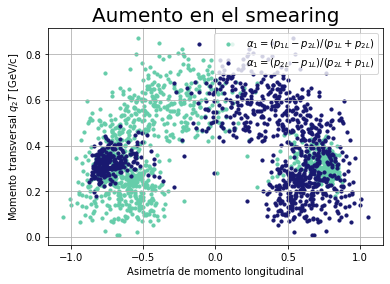


En la gráfica anterior se hizo un aumento en el smearing del 0.2, impidinedo observar las ventanas a comparación de la primera gráfica.


En la siguiente gráfica, el smearing fue del 0.4 y ya es posible evidenciar los datos más dispersados. 


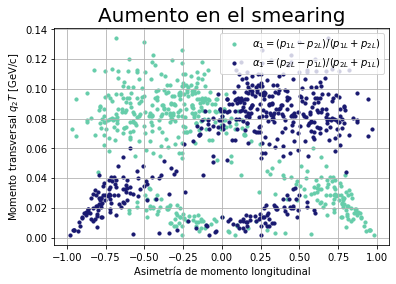

# Gráfica de Armenteros para el Kaon $K^{0}$ y Lambda $\Lambda^{0}$ por Separado

Se mostrarán las gráficas para las partículas por separado.


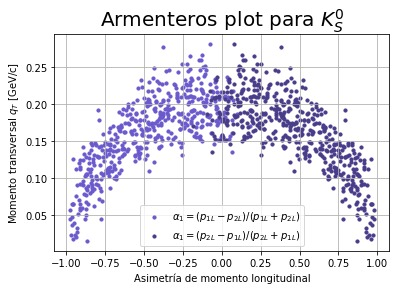


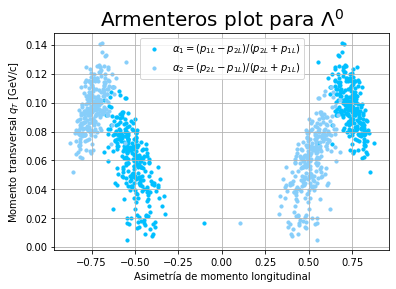



En esta última gráfica se pueden evidenciar las dos parábolas que están relacionadas con la antipartícula lambda ($\bar{\Lambda}^{0}$) [izquierda] y la partícula lambda ($\Lambda^{0}$) [derecha].

#  Filtración de partículas 


Con las gráficas  que se presentaran a continuación se pudo realizar un acotamiento, es decir, una ventana 2D. Se busca evidenciar si realmente al seleccionar los $K^{0}$  eran en su totalidad $K^{0}$  o si por algún motivo se filtraban partículas $\bar{\Lambda}^{0}$ y $\Lambda^{0}$. 

En la siguiente gráfica se realizó un aumento en la ventana, entre 0.10 y 0.20 en el eje $y$, viendo que aunque en su mayoría las partículas son $K^{0}$ (color lila) aún se filtran partículas lambda (color celeste).
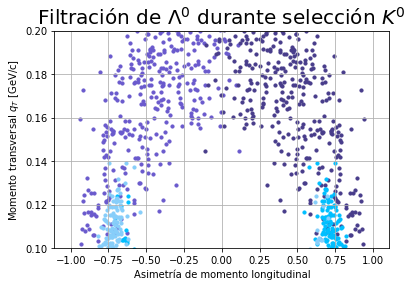


 En esta gráfica se realizó un aumento entre 0.15 y 0.20 en el eje $y$ de ventana, pero en este caso se observa que ya no hay rastro de partículas lambda filtradas. 

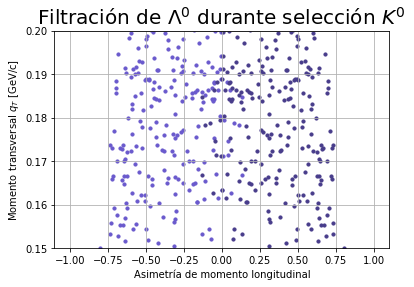

Las gráficas que se presentan a continuación son ventanas 2D del gráfico de Armenteros. Se busca evidenciar si realmente al seleccionar los $\bar{\Lambda}^{0}$ y $\Lambda^{0}$ se filtraban partículas $K^{0}$. 


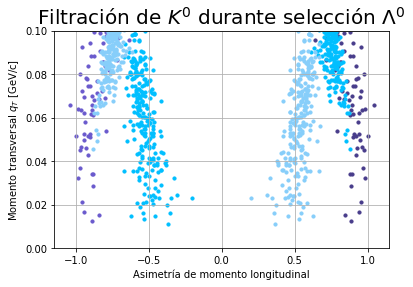


 En esta gráfica anterior se realizó un aumento entre 0.01 y 0.10 en el eje $y$ en la ventana de selección, observando que aún hay rastro de partículas $K^{0}$, aunque en comparación son mínimas


 Ahora en el siguiente gráfico, se realizó un mayor aumento entre 0.01 y 0.05 en el eje $y$, y aún se evidencian $K^{0}$ durante la selección de partículas lambda.
 

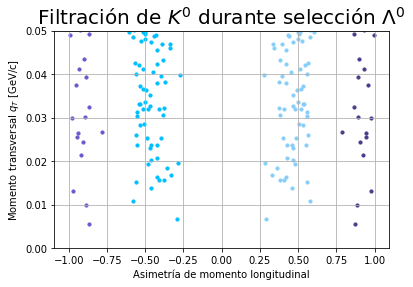


 
 Con estas gráficas se pudo notar que a diferencia de la selección de $K^{0}$ en la que sí se pueden hallar rangos en los que las partículas lambdas no se filtran, para las partículas lambda esto no es posible pues aún en la ventana con mayor aumento aún se filtran los $K^{0}$. 
